In [4]:
import matplotlib.pyplot as plt
from plot_state_borders import plot_state_borders
from collections import Counter
import numpy as np

In [5]:
def vector_subtract(v,w):
    """odejmowanie wektorow"""
    return [v_i - w_i for v_i,w_i in zip(v,w)]

def dot(v,w):
    """v_1 * w_1 + .. +v_n*w_n"""
    return sum(v_i*w_i for v_i, w_i in zip(v,w))
def sum_of_squares(v):
    return dot(v,v)
def magnitude(v): 
    """modul wektora"""
    return np.sqrt(sum_of_squares(v))
def distance(v,w):
    return magnitude(vector_subtract(v,w))

In [14]:
def majority_vote(labels):
    """Funkcja zakłada ze etykiety sa ustawione w kolejnosci od nablizszej do najdalszej"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() 
                        if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        majority_vote(labels[:-1])
        

In [19]:
def knn_classify(k, labeled_points, new_point):
    """Każdemu elementowi zbioru danych powinna być przypisana etykieta."""
    # Ustawiamy punkty oznaczone etykietami w kolejnosci od nablizszej do najdalszej
    by_distance = sorted(labeled_points,
                        key=lambda point: distance(point[0], new_point))
    # Ustalam etykiety k nabliższych punktów
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # Wybieramy zwyciezcze na podstawie tych etykiet
    return majority_vote(k_nearest_labels)

In [20]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [81]:
def add_cities():
    plots = {'Java':([],[]),'Python':([],[]),'R':([],[])}
    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)
    return plots

def plot_cities(func=add_cities):
    plots = func()
    markers = {'Java': 'o', 'Python': 's', 'R': '^'}
    colors = {'Java': 'r', 'Python': 'b', 'R': 'g'}
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10,8)

    
    for language, (x,y) in plots.items():
        ax = plt.scatter(x,y, color=colors[language],marker=markers[language],
                    label=language,zorder=10)
    plot_state_borders(color='black')
   
    plt.legend(loc=0)
    plt.axis([-130,-60,20,55])
    plt.title('Ulubione jezyki programowania')
    plt.show()

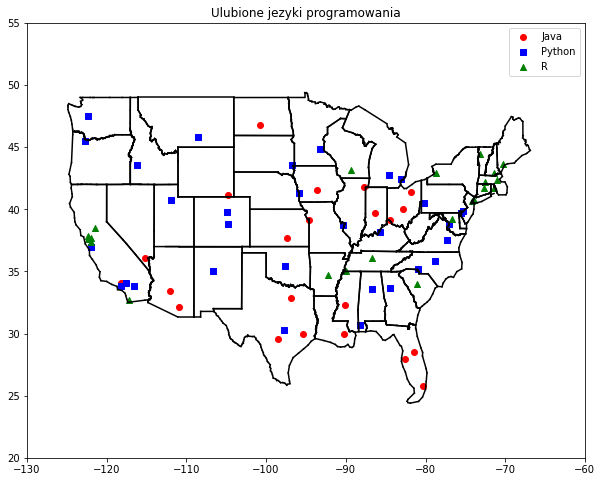

In [82]:
plot_cities()

In [83]:

for k in [1,3,5,7]:
    num_correct = 0

    for city in cities:
        location, actual_language = city
        other_cities = [other_city for other_city in cities
                        if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)        
        if predicted_language == actual_language:
            num_correct +=1
    
    print (k, "sąsiad(ów):", num_correct, "Poprawnie na", len(cities))

1 sąsiad(ów): 40 Poprawnie na 75
3 sąsiad(ów): 42 Poprawnie na 75
5 sąsiad(ów): 29 Poprawnie na 75
7 sąsiad(ów): 32 Poprawnie na 75


Wszystko wskazuje na to, że metoda k sasiadow dziala najlepiej dla k=3

In [84]:

def predict_language():
    plots = {'Java':([],[]),'Python':([],[]),'R':([],[])}
    k = 1

    for longitude in range(-130,-60):
        for latitude in range(20,55):
            predicted_language = knn_classify(k, cities, [longitude,latitude])
            if predicted_language != None:
                plots[predicted_language][0].append(longitude)
                plots[predicted_language][1].append(latitude)
    return plots

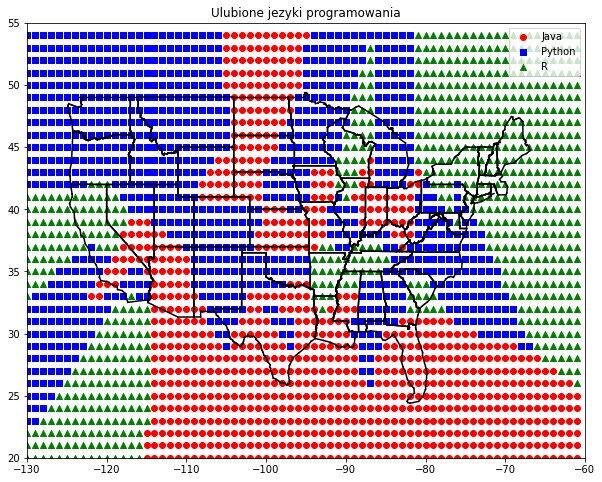

In [85]:
plot_cities(predict_language)